In [28]:
from scipy.io import netcdf
import numpy
import netCDF4
import pandas
import aacgmv2
import xarray
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colors import Normalize
from matplotlib import ticker
from matplotlib.ticker import FuncFormatter, MaxNLocator
from mpl_toolkits.mplot3d import Axes3D
from davitpy import utils
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
ampFName = "../data/20110516.0000.86400.120.north.grd.ncdf"
startDate = datetime.datetime( 2011, 5, 16, 8, 0 )
selDate = datetime.datetime( 2011, 5, 16, 8, 30 )
endDate = datetime.datetime( 2011, 5, 16, 8, 40 )
delTime = datetime.timedelta(minutes=10)
coords = "mlt"

In [3]:
# currDataSet = netCDF4.Dataset(ampFName)
# currDataSet.variables.keys()

In [4]:
# # get the variables into a DF
# nlon = currDataSet.variables["nlon"][:]
# nlat = currDataSet.variables["nlat"][:]
# # start time vars
# start_yr = currDataSet.variables["start_yr"][:]
# start_mo = currDataSet.variables["start_mo"][:]
# start_dy = currDataSet.variables["start_dy"][:]
# start_hr = currDataSet.variables["start_hr"][:]
# start_mt = currDataSet.variables["start_mt"][:]
# start_sc = currDataSet.variables["start_sc"][:]
# # end time vars
# end_yr = currDataSet.variables["end_yr"][:]
# end_mo = currDataSet.variables["end_mo"][:]
# end_dy = currDataSet.variables["end_dy"][:]
# end_hr = currDataSet.variables["end_hr"][:]
# end_mt = currDataSet.variables["end_mt"][:]
# end_sc = currDataSet.variables["end_sc"][:]
# # measurements
# Jr = currDataSet.variables["Jr"][:]
# dBr = currDataSet.variables["dBr"][:]
# dBnorth1 = currDataSet.variables["dBnorth1"][:]
# dBeast1 = currDataSet.variables["dBeast1"][:]
# dBnorth2 = currDataSet.variables["dBnorth2"][:]
# dBeast2 = currDataSet.variables["dBeast2"][:]
# mlt = currDataSet.variables["mlt"][:]
# var = currDataSet.variables["colat"][:]
# print var.shape

In [5]:
dsXarr = xarray.open_dataset(ampFName)
ampDF = dsXarr.to_dataframe()
ampDF["start_date"] = pandas.to_datetime( dict(year=ampDF.start_yr,\
                    month=ampDF.start_mo, day=ampDF.start_dy,\
                    hour=ampDF.start_hr, minute=ampDF.start_mt,\
                    second=ampDF.start_sc))
ampDF["end_date"] = pandas.to_datetime( dict(year=ampDF.end_yr,\
                    month=ampDF.end_mo, day=ampDF.end_dy,\
                    hour=ampDF.end_hr, minute=ampDF.end_mt,\
                    second=ampDF.end_sc))
ampDF["mlat"] = 90. - ampDF["colat"]
selCols = ['start_date', 'end_date', 'mlat',\
           'mlt', 'dBnorth1', 'dBeast1',\
       'dBnorth2', 'dBeast2', 'dBr', 'Jr']
ampDF = ampDF[selCols].reset_index(drop=True)

ampDF.head()

,start_date,end_date,mlat,mlt,dBnorth1,dBeast1,dBnorth2,dBeast2,dBr,Jr
0,2011-05-16,2011-05-16 00:10:00,89.0,0.0,82.529999,60.080002,76.720001,67.349998,-2.50,-0.21
1,2011-05-16,2011-05-16 00:10:00,88.0,0.0,80.660004,31.370001,76.199997,41.020000,-2.55,-0.27
2,2011-05-16,2011-05-16 00:10:00,87.0,0.0,61.980000,1.050000,61.169998,10.080000,4.62,-0.28
3,2011-05-16,2011-05-16 00:10:00,86.0,0.0,32.880001,-19.570000,35.610001,-13.990000,13.99,-0.25
4,2011-05-16,2011-05-16 00:10:00,85.0,0.0,9.180000,-25.520000,13.440000,-23.559999,22.02,-0.18


(50, 75)

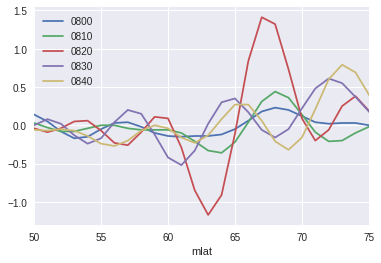

In [10]:
# Plot using matplotlib
fig1 = plt.figure()
ax = fig1.add_subplot(111)
selMlt = 21.
currDate = startDate
while currDate <= endDate:
    selDF = ampDF[ ((ampDF["start_date"] == currDate) &\
                    (ampDF["mlt"] == selMlt)) & (numpy.abs(ampDF["Jr"])>=0.) ]
    selDF.plot( x="mlat", y="Jr", ax=ax,label=currDate.strftime("%H%M"))
    currDate += delTime
ax.set_xlim([50,75])
# for sm in selMlts:
#     selDF = ampDF[ ((ampDF["start_date"] == selDate) &\
#                     (ampDF["mlt"] == sm)) & (numpy.abs(ampDF["Jr"])>=0.) ]
# #     selDF.plot( x="mlat", y="dBr", ax=ax,label=str(sm))
#     selDF.plot( x="mlat", y="Jr", ax=ax,label=str(sm))
# ax.set_xlim([50,75])

/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


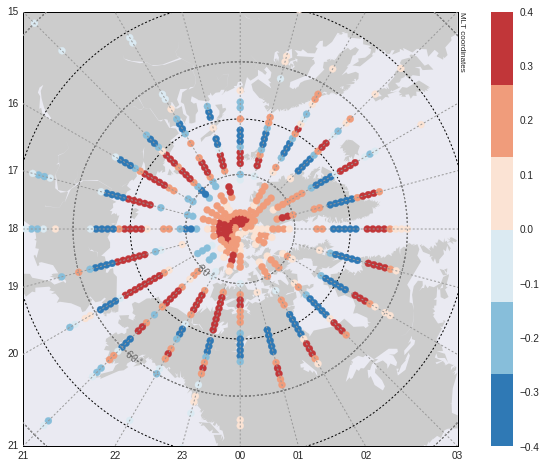

In [7]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)

seaMap = ListedColormap(sns.color_palette("RdBu_r"))

plotAmpDF = ampDF[ (ampDF["start_date"] == selDate) &\
                 (numpy.abs(ampDF["Jr"]) >= 0.1) ]
mapHandle = utils.plotUtils.mapObj(boundinglat=50., coords=coords, lat_0=90., lon_0=0, datetime=selDate)
parallels = numpy.arange(0.,81,10.)
mapHandle.drawparallels(parallels)
xVecs, yVecs = mapHandle(plotAmpDF["mlt"].values*15., plotAmpDF["mlat"].values, coords=coords)
ampPlot = mapHandle.scatter( xVecs, yVecs, c=plotAmpDF["Jr"], zorder=7., cmap=seaMap, ax=ax, vmin=-0.4,vmax=0.4 )
cbar = plt.colorbar(ampPlot, orientation='vertical')

(50, 75)

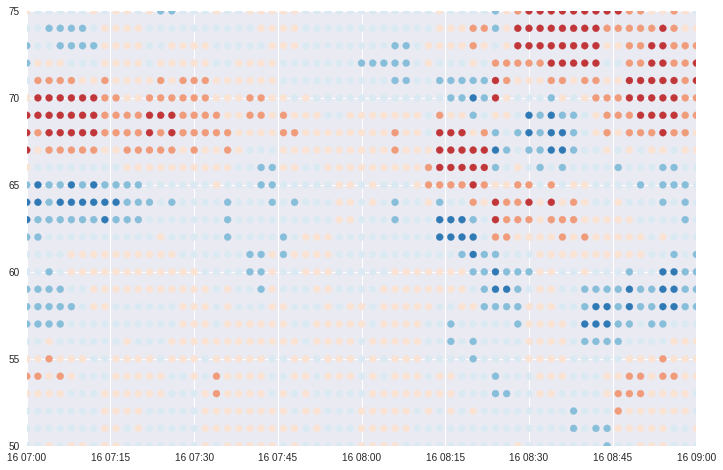

In [41]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
seaMap = ListedColormap(sns.color_palette("RdBu_r"))


rtiAmpDF = ampDF[ (ampDF["mlt"] == 22.) &\
                 (numpy.abs(ampDF["Jr"]) >= 0.) ]

ax.scatter( rtiAmpDF["start_date"].values, rtiAmpDF["mlat"].values,\
           c=rtiAmpDF["Jr"].values, cmap=seaMap,vmin=-0.4, vmax=0.4 )
ax.set_xlim( [datetime.datetime(2011,5,16,7,0), datetime.datetime(2011,5,16,9,0)] )
ax.set_ylim( [50, 75] )

In [14]:
rtiAmpDF.head()

,start_date,end_date,mlat,mlt,dBnorth1,dBeast1,dBnorth2,dBeast2,dBr,Jr
1100,2011-05-16,2011-05-16 00:10:00,89.0,22.0,106.349998,13.620000,104.930000,22.059999,0.590000,-0.15
1101,2011-05-16,2011-05-16 00:10:00,88.0,22.0,102.510002,-2.860000,102.269997,7.540000,-2.390000,-0.16
1102,2011-05-16,2011-05-16 00:10:00,87.0,22.0,91.489998,-15.070000,92.629997,-4.160000,-3.320000,-0.14
1103,2011-05-16,2011-05-16 00:10:00,86.0,22.0,79.540001,-21.520000,81.680000,-10.870000,-1.760000,-0.11
1118,2011-05-16,2011-05-16 00:10:00,71.0,22.0,39.070000,-29.620001,44.200001,-21.209999,27.799999,-0.21
